# Importing Data & Libraries

In [2]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

appearances_df = pd.read_csv("C:/Users/Louis/Desktop/3°Anno/IUM/Progetto/FootballData/appearances.csv")

# Data Preparation

In [3]:
appearances_df.shape

(1507351, 13)

In [4]:
appearances_df.head(10)

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
5,2234421_146889,2234421,146889,195,190,2012-07-05,Peter Ankersen,ELQ,1,0,0,0,90
6,2235539_28716,2235539,28716,282,7185,2012-07-05,Adi Adilovic,ELQ,0,0,0,0,90
7,2235539_69445,2235539,69445,282,19771,2012-07-05,Ivan Sesar,ELQ,1,0,0,1,90
8,2235545_19409,2235545,19409,317,200,2012-07-05,Willem Janssen,ELQ,0,0,0,0,45
9,2235545_30003,2235545,30003,317,317,2012-07-05,Wout Brama,ELQ,0,0,0,0,90


In [5]:
appearances_df = appearances_df.set_index('appearance_id')
appearances_df.head(10)

,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
appearance_id,,,,,,,,,,,,
2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
2234421_146889,2234421,146889,195,190,2012-07-05,Peter Ankersen,ELQ,1,0,0,0,90
2235539_28716,2235539,28716,282,7185,2012-07-05,Adi Adilovic,ELQ,0,0,0,0,90
2235539_69445,2235539,69445,282,19771,2012-07-05,Ivan Sesar,ELQ,1,0,0,1,90
2235545_19409,2235545,19409,317,200,2012-07-05,Willem Janssen,ELQ,0,0,0,0,45


In [6]:
appearances_df.isna().sum()

# alcuni nomi mancano, ma i player_id sono sempre presenti
# si potrebbe inserire i nomi dei giocatori, prendendoli da un altro csv, utilizzando il loro id come controllo (?)

game_id                     0
player_id                   0
player_club_id              0
player_current_club_id      0
date                        0
player_name               324
competition_id              0
yellow_cards                0
red_cards                   0
goals                       0
assists                     0
minutes_played              0
dtype: int64

In [7]:
players_df = pd.read_csv("C:/Users/Louis/Desktop/3°Anno/IUM/Progetto/FootballData/players.csv")

player_ids_in_appearances = appearances_df['player_id'].unique()
players_df_subset = players_df[players_df['player_id'].isin(player_ids_in_appearances)]

players_df_subset = players_df_subset[['player_id', 'name']]

df_merged = pd.merge(appearances_df, players_df_subset, on = 'player_id', how = 'left')

df_merged

# non funziona, da rivedere

,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,name
0,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90,Aurélien Joachim
1,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90,Ruslan Abyshov
2,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45,Sander Puri
3,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90,Vegar Hedenstad
4,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90,Markus Henriksen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507346,4172154,659813,15,15,2023-11-30,Piero Hincapié,EL,0,0,0,0,90,Piero Hincapié
1507347,4172154,696027,15,15,2023-11-30,Ayman Aourir,EL,0,0,0,0,2,Ayman Aourir
1507348,4172154,7161,15,15,2023-11-30,Jonas Hofmann,EL,0,0,0,0,10,Jonas Hofmann
1507349,4172154,743395,15,15,2023-11-30,Noah Mbamba,EL,0,0,0,0,45,Noah Mbamba


In [8]:
appearances_df.loc[appearances_df.duplicated()]

,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
appearance_id,,,,,,,,,,,,


In [9]:
appearances_df.dtypes

game_id                    int64
player_id                  int64
player_club_id             int64
player_current_club_id     int64
date                      object
player_name               object
competition_id            object
yellow_cards               int64
red_cards                  int64
goals                      int64
assists                    int64
minutes_played             int64
dtype: object

In [10]:
appearances_df['date'] = pd.to_datetime(appearances_df['date'])
appearances_df.dtypes

game_id                            int64
player_id                          int64
player_club_id                     int64
player_current_club_id             int64
date                      datetime64[ns]
player_name                       object
competition_id                    object
yellow_cards                       int64
red_cards                          int64
goals                              int64
assists                            int64
minutes_played                     int64
dtype: object

# Data Analysis & Visualization

In [20]:
player_occurrences = appearances_df['player_id'].value_counts()

max_app_player_id = player_occurrences.idxmax()

max_app_player_name = appearances_df.loc[appearances_df['player_id'] == max_app_player_id, 'player_name'].iloc[0]
print(f'Il giocatore con più presenze è {max_app_player_name}')

Il giocatore con più presenze è Ivan Rakitic


In [12]:
total_minutes_per_player = appearances_df.groupby('player_id')['minutes_played'].sum()

max_minutes_played_by = appearances_df.loc[appearances_df['player_id'] == total_minutes_per_player.idxmax(), 'player_name'].iloc[0]

f'Il giocatore con più minuti di gioco è {max_minutes_played_by}, con un totale di {total_minutes_per_player.max()} minuti giocati'

'Il giocatore con più minuti di gioco è Robert Lewandowski, con un totale di 45220 minuti giocati'

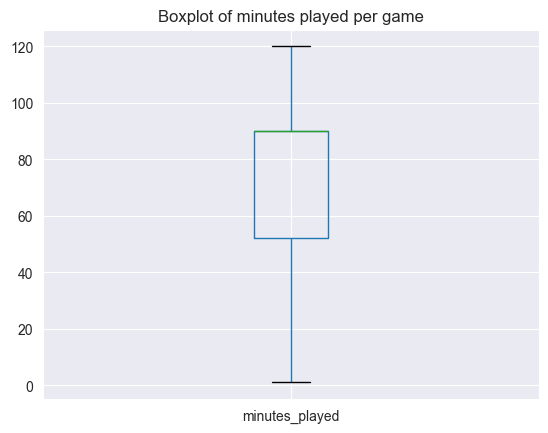

In [13]:
ax = appearances_df.boxplot(column='minutes_played')
ax.set_title('Boxplot of minutes played per game')
plt.show()

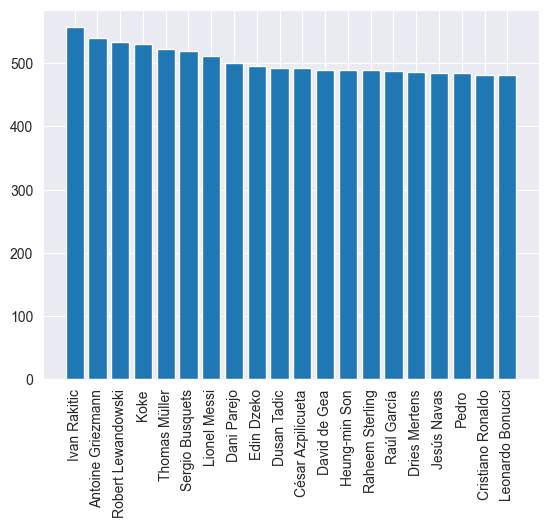

In [47]:
current_players = appearances_df.query('player_current_club_id > -1')

top20_players_app = current_players['player_id'].value_counts().head(20)
top20_players_app

merged_df = pd.merge(top20_players_app, players_df, left_index=True, right_on='player_id')

plt.bar(merged_df['name'], merged_df['count'])
plt.xticks(rotation=90)
plt.show()


In [43]:
appearances_df.query('club_id == 17784')

UndefinedVariableError: name 'club_id' is not defined